In [ ]:
# Name : Kishor kumar B
#  Register Name : 212223240072
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
auth.authenticate_user()
creds,_ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('ex-1').sheet1
rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})


In [ ]:
X = df[['input']].values
y = df[['output']].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)

In [ ]:
AI_Brain = Sequential([
    Dense(units = 6, activation = 'relu', input_shape=[1]),
    Dense(units = 5, activation = 'relu'),
    Dense(units = 1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
AI_Brain.compile(optimizer= 'rmsprop', loss="mse")
AI_Brain.fit(X_train1,y_train,epochs=5000)
AI_Brain.summary()

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 5080.9326
Epoch 2502/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 5075.4917
Epoch 2503/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 5070.0498
Epoch 2504/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5064.6094
Epoch 2505/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 5059.1699
Epoch 2506/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 5053.7300
Epoch 2507/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 5048.2920
Epoch 2508/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5042.8535
Epoch 2509/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 5037.4150
Epoch 2510/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5031.9775
Epoch 2511/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5026.5400
Epoch 2512/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 5021.1030
Epoch 2513/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 5015.6665
Epoch 2514

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108 (436.00 B)

 Trainable params: 53 (212.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 55 (224.00 B)

<Axes: >

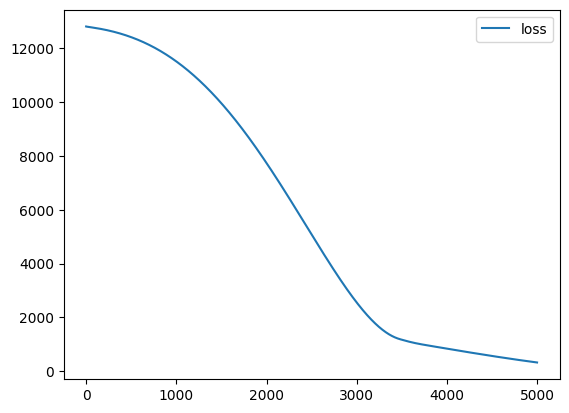

In [10]:
loss_df = pd.DataFrame(AI_Brain.history.history)

loss_df.plot()

In [11]:
X_test1 = Scaler.transform(X_test)

In [12]:
AI_Brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 369.2900


369.2900390625

In [13]:
X_n1 = [[20]]
X_n1_1 = Scaler.transform(X_n1)
AI_Brain.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[174.83162]], dtype=float32)